# Boosting and Stacking Exercises

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [3]:
from __future__ import print_function
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import os
data_path = ['data', 'Human_Activity_Recognition_Using_Smartphones_Data.csv']

## Question 1

* Import the data from the file `Human_Activity_Recognition_Using_Smartphones_Data.csv` and examine the shape and data types. For the data types, there will be too many to list each column separately. Rather, aggregate the types by count.
* Determine if the float columns need to be scaled.

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv(os.sep.join(data_path))

data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [5]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

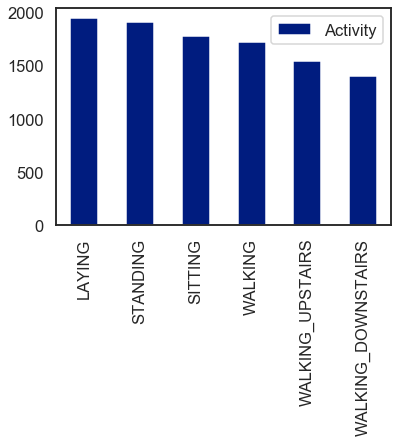

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

pd.DataFrame(data['Activity'].value_counts()).plot.bar()

## Question 2

* Integer encode the activities.
* Split the data into train and test data sets. Decide if the data will be stratified or not during the train/test split.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

target = le.fit_transform(data['Activity'])

In [8]:
features = data.drop('Activity', axis=1)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

train_ids, test_ids = next(StratifiedShuffleSplit(n_splits=1, test_size=0.25).split(features, target))

X_train, X_test = features.iloc[train_ids], features.iloc[test_ids]
y_train, y_test = target[train_ids], target[test_ids]

## Question 3

* Fit gradient boosted tree models with all parameters set to their defaults the following tree numbers (`n_estimators = [25, 50, 100, 200, 400]`) and evaluate the accuracy on the test data for each of these models. 
* Plot the accuracy as a function of estimator number.

**Note:** This question may take some time to execute, depending on how many different values are fit for estimators. Setting `max_features=4` in the gradient boosting classifier will increase the convergence rate.

Also, this is similar to question 3 from week 9, except that there is no such thing as out-of-bag error for boosted models. And the `warm_flag=True` setting has a bug in the gradient boosted model, so don't use it. Simply create the model inside the `for` loop and set the number of estimators at this time. This will make the fitting take a little longer. Additionally, boosting models tend to take longer to fit than bagged ones because the decision stumps must be fit successively.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

acc_history = list()
n_estimators = [25, 50, 100, 200, 400]

for i in n_estimators:
    grad_boost = GradientBoostingClassifier(n_estimators=i, max_features=4)
    grad_boost.fit(X_train, y_train)
    
    acc_history.append(grad_boost.score(X_test, y_test))

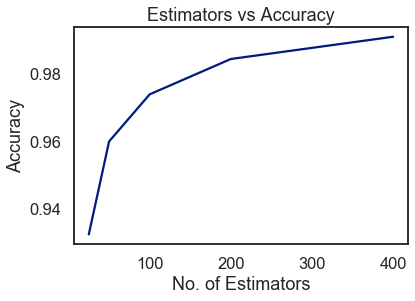

In [11]:
import matplotlib.pyplot as plt

plt.plot(n_estimators, acc_history)
plt.xlabel('No. of Estimators')
plt.ylabel('Accuracy')
plt.title('Estimators vs Accuracy')
plt.show()

## Question 4

* Using a grid search with cross-validation, fit a new gradient boosted classifier with the a list of estimators, similar to question 3. Also consider  varying the learning rates (0.1, 0.01, 0.001, etc.), the subsampling value (1.0 or 0.5), and the number of maximum features (1, 2, etc.).
* Examine the parameters of the best fit model.
* Calculate relevant error metrics on this model and examine the confusion matrix.

**Note:** this question may take some time to execute, depending on how many features are associated with the grid search. It is recommended to start with only a few to ensure everything is working correctly and then add more features. Setting `max_features=4` in the gradient boosting classifier will increase the convergence rate.

In [12]:
from sklearn.model_selection import GridSearchCV

lrs = [0.1, 0.01, 0.001]

parameters = {'n_estimators': n_estimators, 'learning_rate': lrs}

grad_boost = GradientBoostingClassifier(max_features=4)
grid = GridSearchCV(grad_boost, parameters, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=4,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
            

In [13]:
print('Best Parameters:', grid.best_params_)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}


In [14]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score

predicted = grid.predict(X_test)

fs = precision_recall_fscore_support(y_test, predicted)

print('Accuracy:', accuracy_score(y_test, predicted))
print('Precision:', fs[0])
print('Recall:', fs[1])
print('fScore:', fs[2])
print(confusion_matrix(y_test, predicted))

Accuracy: 0.9922330097087378
Precision: [1.         0.97977528 0.98526316 1.         0.99433428 0.99481865]
Recall: [1.         0.98198198 0.98113208 0.99767981 1.         0.99481865]
fScore: [1.         0.98087739 0.98319328 0.99883856 0.99715909 0.99481865]
[[486   0   0   0   0   0]
 [  0 436   7   0   0   1]
 [  0   9 468   0   0   0]
 [  0   0   0 430   0   1]
 [  0   0   0   0 351   0]
 [  0   0   0   0   2 384]]


## Question 5

* Create an AdaBoost model and fit it using grid search, much like question 4. Try a range of estimators between 100 and 200.
* Compare the errors from AdaBoost to those from the GradientBoostedClassifier.

**NOTE:** Setting `max_features=4` in the decision tree classifier used as the base classifier for AdaBoost will increase the convergence rate.

In [15]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'n_estimators': [100, 140, 160, 200], 'learning_rate': lrs}

ada_boost = AdaBoostClassifier()
grid = GridSearchCV(ada_boost, parameters, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 140, 160, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
print('Best Parameters:', grid.best_params_)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}


In [18]:
predicted = grid.predict(X_test)

fs = precision_recall_fscore_support(y_test, predicted)

print('Accuracy:', accuracy_score(y_test, predicted))
print('Precision:', fs[0])
print('Recall:', fs[1])
print('fScore:', fs[2])
print(confusion_matrix(y_test, predicted))

Accuracy: 0.7941747572815534
Precision: [0.99794239 0.62046205 0.58670989 0.84957627 0.91724138 0.84275184]
Recall: [0.99794239 0.42342342 0.75890985 0.93039443 0.75783476 0.88860104]
fScore: [0.99794239 0.50334672 0.66179159 0.88815061 0.8299532  0.86506936]
[[485   0   0   0   0   1]
 [  1 188 255   0   0   0]
 [  0 115 362   0   0   0]
 [  0   0   0 401  13  17]
 [  0   0   0  39 266  46]
 [  0   0   0  32  11 343]]


## Question 6

* Fit a logistic regression model with regularization. This can be a replica of a model that worked well in the exercises from week 4.
* Using `VotingClassifier`, fit the logistic regression model along with either the GratientBoostedClassifier or the AdaBoost model (or both) from questions 4 and 5.
* Determine the error as before and compare the results to the appropriate gradient boosted model(s).
* Plot the confusion matrix for the best model created in this set of exercises.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(penalty='l2', solver='saga', n_jobs=-1)

vclassifier = VotingClassifier(estimators=[('model1', lr), ('model2', ada_boost), ('model3', grad_boost)])
vclassifier.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='saga', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('model2',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning...
                                                

Accuracy: 0.7941747572815534
Precision: [0.99794239 0.62046205 0.58670989 0.84957627 0.91724138 0.84275184]
Recall: [0.99794239 0.42342342 0.75890985 0.93039443 0.75783476 0.88860104]
fScore: [0.99794239 0.50334672 0.66179159 0.88815061 0.8299532  0.86506936]
[[485   0   0   0   0   1]
 [  1 188 255   0   0   0]
 [  0 115 362   0   0   0]
 [  0   0   0 401  13  17]
 [  0   0   0  39 266  46]
 [  0   0   0  32  11 343]]


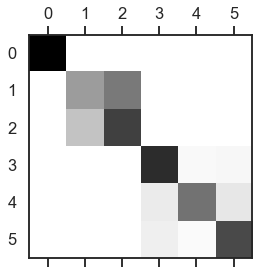

In [20]:
predicted = grid.predict(X_test)

fs = precision_recall_fscore_support(y_test, predicted)

print('Accuracy:', accuracy_score(y_test, predicted))
print('Precision:', fs[0])
print('Recall:', fs[1])
print('fScore:', fs[2])
print(confusion_matrix(y_test, predicted))

plt.matshow(confusion_matrix(y_test, predicted), cmap='gray_r')